In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def load_data():

    customers = pd.read_csv('/content/Customers.csv')
    products = pd.read_csv('/content/Products.csv')
    transactions = pd.read_csv('/content/Transactions.csv')

    # Merge datasets
    data = transactions.merge(customers, on='CustomerID', how='left').merge(products, on='ProductID', how='left')

    # Rename columns for clarity
    data.rename(columns={'Price_x': 'TransactionPrice', 'Price_y': 'ProductPrice'}, inplace=True)

    return customers, products, transactions, data

In [ ]:
def eda_and_insights(data):
    print("Summary Statistics:\n", data.describe())

    # Visualizations
    plt.figure(figsize=(10, 6))
    sns.countplot(data['Region'])
    plt.title('Customer Distribution by Region')
    plt.show()

    plt.figure(figsize=(10, 6))
    data.groupby('Category')['TotalValue'].sum().plot(kind='bar', color='skyblue')
    plt.title('Revenue by Product Category')
    plt.show()




--- Performing EDA and Business Insights ---
Summary Statistics:
           Quantity   TotalValue  TransactionPrice  ProductPrice
count  1000.000000  1000.000000        1000.00000    1000.00000
mean      2.537000   689.995560         272.55407     272.55407
std       1.117981   493.144478         140.73639     140.73639
min       1.000000    16.080000          16.08000      16.08000
25%       2.000000   295.295000         147.95000     147.95000
50%       3.000000   588.880000         299.93000     299.93000
75%       4.000000  1011.660000         404.40000     404.40000
max       4.000000  1991.040000         497.76000     497.76000


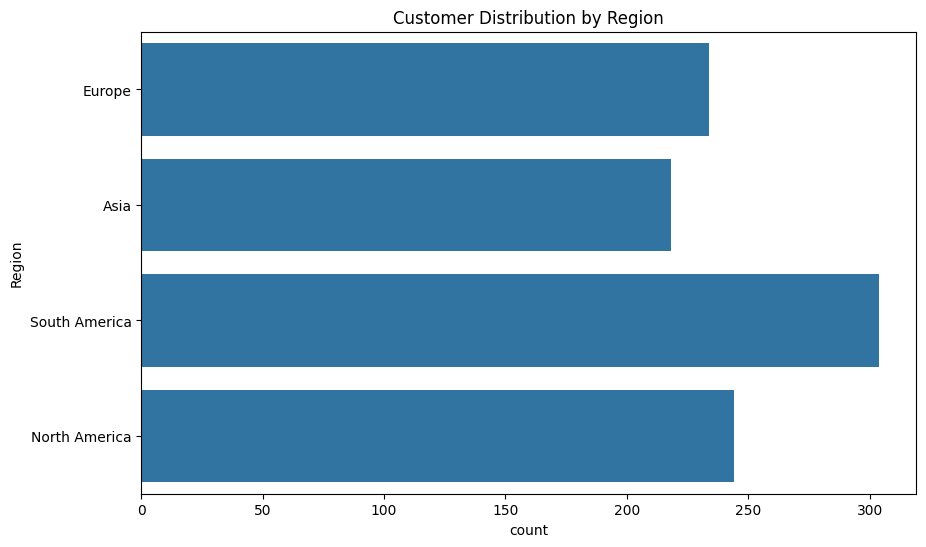

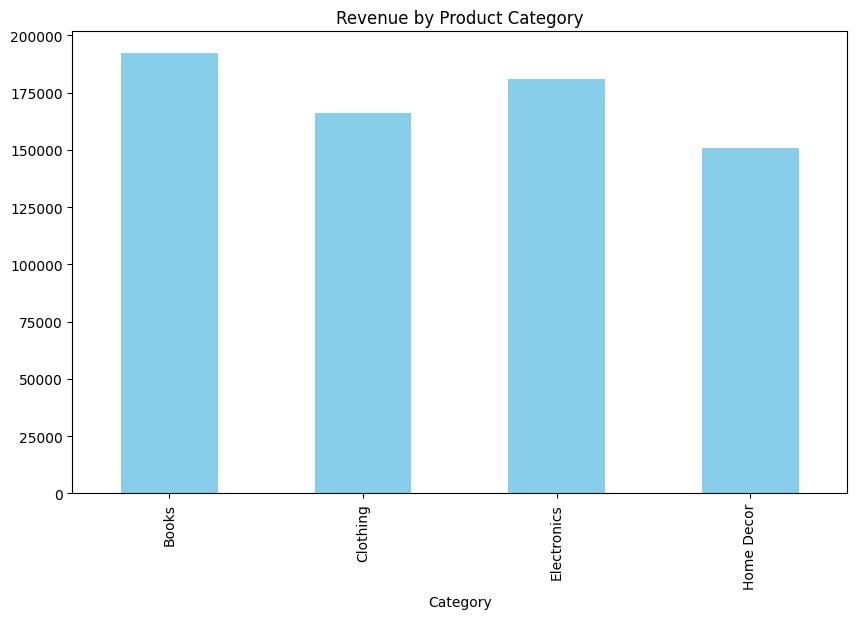

In [ ]:
if __name__ == "__main__":
    customers, products, transactions, data = load_data()
    #print(data.head())
    print("--- Performing EDA and Business Insights ---")
    eda_and_insights(data)

Revenue by Category:
 Category
Books          192147.47
Electronics    180783.50
Clothing       166170.66
Home Decor     150893.93
Name: TotalValue, dtype: float64
Top Categories:
 Category
Books          192147.47
Electronics    180783.50
Name: TotalValue, dtype: float64


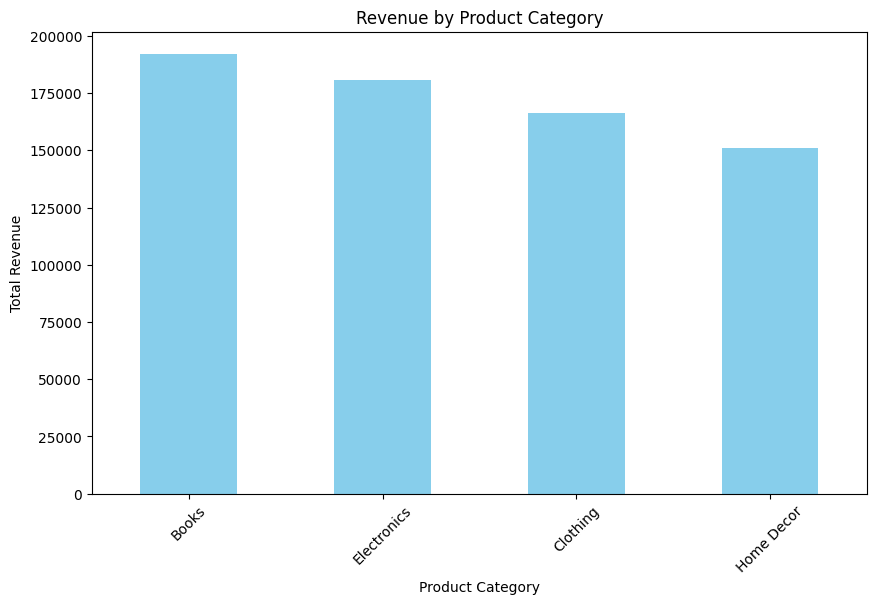

In [ ]:
category_revenue = data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
top_categories = category_revenue.head(2)

# Print results
print("Revenue by Category:\n", category_revenue)
print("Top Categories:\n", top_categories)

# Visualization
plt.figure(figsize=(10, 6))
category_revenue.plot(kind='bar', color='skyblue')
plt.title('Revenue by Product Category')
plt.ylabel('Total Revenue')
plt.xlabel('Product Category')
plt.xticks(rotation=45)
plt.show()


Revenue by Region:
 Region
South America    219352.56
Europe           166254.63
North America    152313.40
Asia             152074.97
Name: TotalValue, dtype: float64
Top Regions:
 Region
South America    219352.56
Europe           166254.63
Name: TotalValue, dtype: float64


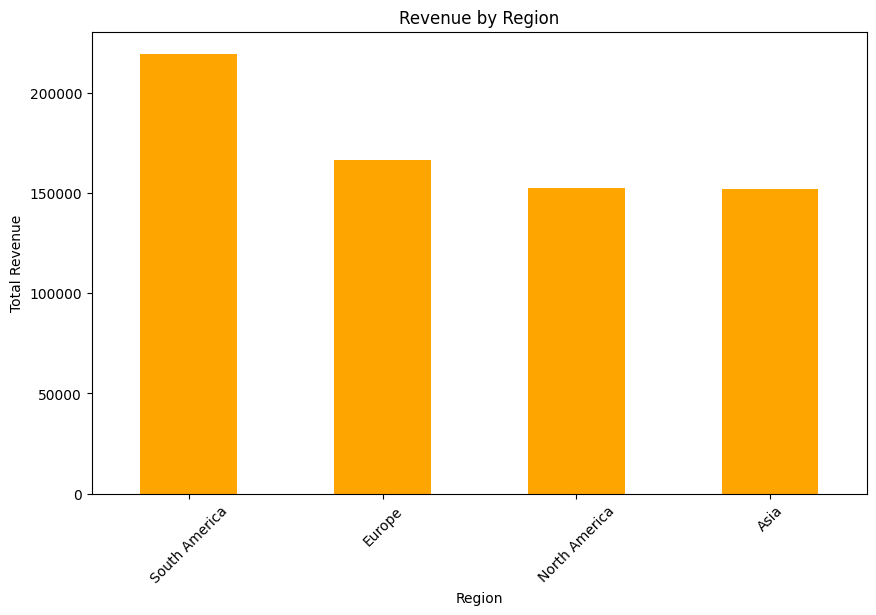

In [ ]:
# Calculate Revenue by Region
region_revenue = data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
top_regions = region_revenue.head(2)
print("Revenue by Region:\n", region_revenue)
print("Top Regions:\n", top_regions
plt.figure(figsize=(10, 6))
region_revenue.plot(kind='bar', color='orange')
plt.title('Revenue by Region')
plt.ylabel('Total Revenue')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Customer Repeat Purchase Analysis
repeat_purchases = data.groupby('CustomerID')['TransactionID'].count().sort_values(ascending=False)
top_repeat_customers = repeat_purchases[repeat_purchases > 1]
repeat_customer_percentage = len(top_repeat_customers) / len(repeat_purchases) * 100
print(f"Percentage of Repeat Customers: {repeat_customer_percentage:.2f}%")
repeat_customers = repeat_purchases[repeat_purchases > 1]
repeat_customer_percentage = (len(repeat_customers) / len(repeat_purchases)) * 100
transaction_contribution = (repeat_customers.sum() / repeat_purchases.sum()) * 100
print(f"Transaction Contribution of Repeat Customers: {transaction_contribution:.2f}%")
print("Top 5 Repeat Customers:\n", top_repeat_customers.head())


Percentage of Repeat Customers: 93.97%
Transaction Contribution of Repeat Customers: 98.80%
Top 5 Repeat Customers:
 CustomerID
C0156    11
C0109    11
C0175    10
C0141    10
C0065    10
Name: TransactionID, dtype: int64


Number of High-Value Customers: 42
High-Value Customers:
 CustomerID
C0141    10673.87
C0054     8040.39
C0065     7663.70
C0156     7634.45
C0082     7572.91
Name: TotalValue, dtype: float64
High-Value Customer Contribution to Revenue: 37.34%


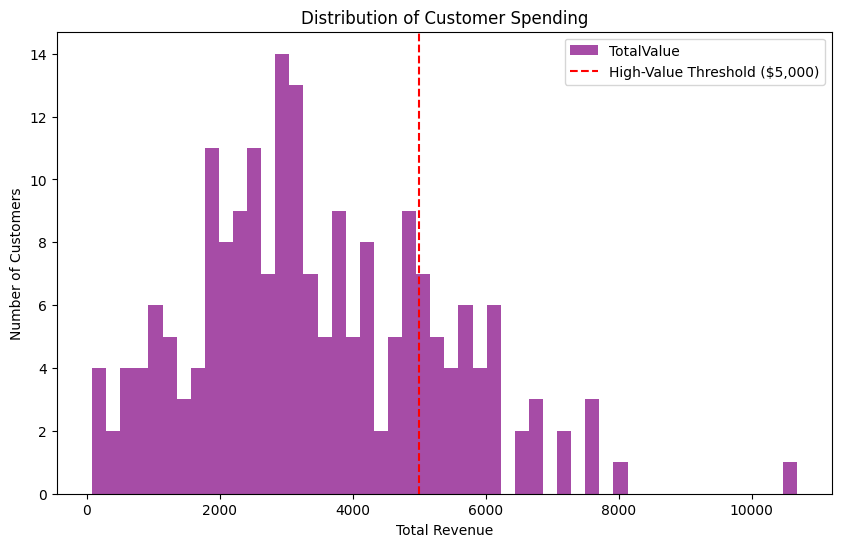

In [31]:
# High-Value Customers Analysis
customer_revenue = data.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False)
high_value_customers = customer_revenue[customer_revenue > 5000]
high_value_percent = (high_value_customers.sum() / customer_revenue.sum()) * 100
print(f"Number of High-Value Customers: {len(high_value_customers)}")
print("High-Value Customers:\n", high_value_customers.head())
print(f"High-Value Customer Contribution to Revenue: {high_value_percent:.2f}%")
plt.figure(figsize=(10, 6))
customer_revenue.plot(kind='hist', bins=50, color='purple', alpha=0.7)
plt.title('Distribution of Customer Spending')
plt.xlabel('Total Revenue')
plt.ylabel('Number of Customers')
plt.axvline(5000, color='red', linestyle='--', label='High-Value Threshold ($5,000)')
plt.legend()
plt.show()


Monthly Sales:
 Month
1     66376.39
2     51459.27
3     47828.73
4     57519.06
5     64527.74
6     48771.18
7     71366.39
8     63436.74
9     70603.75
10    47063.22
11    38224.37
12    62818.72
Name: TotalValue, dtype: float64
Peak Months:
 Month
7    71366.39
9    70603.75
Name: TotalValue, dtype: float64


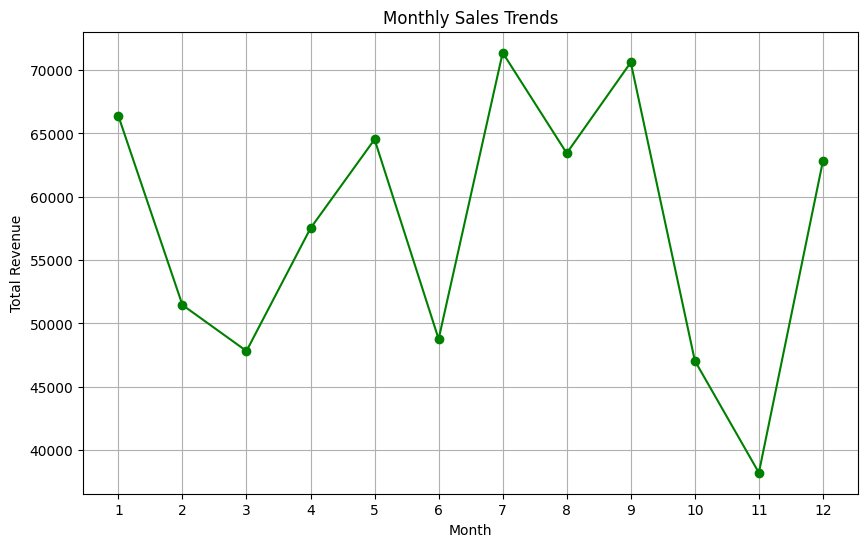

In [ ]:
# Sales by Month
data['TransactionDate'] = pd.to_datetime(data['TransactionDate'])
data['Month'] = data['TransactionDate'].dt.month
monthly_sales = data.groupby('Month')['TotalValue'].sum()
print("Monthly Sales:\n", monthly_sales)
peak_months = monthly_sales.nlargest(2)
print("Peak Months:\n", peak_months)
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='line', marker='o', color='green')
plt.title('Monthly Sales Trends')
plt.ylabel('Total Revenue')
plt.xlabel('Month')
plt.xticks(range(1, 13))
plt.grid()
plt.show()


In [ ]:
# Customer Lifetime Value (CLV)
customer_lifetime_value = data.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False)
avg_clv = customer_lifetime_value.mean()
print(f"Average CLV: ${avg_clv:.2f}")
print("Top 5 Customers by CLV:\n", customer_lifetime_value.head())


Average CLV: $3467.31
Top 5 Customers by CLV:
 CustomerID
C0141    10673.87
C0054     8040.39
C0065     7663.70
C0156     7634.45
C0082     7572.91
Name: TotalValue, dtype: float64


In [ ]:
# Calculate churn rate
latest_date = data['TransactionDate'].max()
six_months_ago = latest_date - pd.DateOffset(months=6)
churned_customers = data[data['TransactionDate'] < six_months_ago]['CustomerID'].nunique()
total_customers = data['CustomerID'].nunique()
churn_rate = (churned_customers / total_customers) * 100
print(f"Churn Rate: {churn_rate:.2f}%")


Churn Rate: 92.96%


In [ ]:
# Product Return Rate
if 'Quantity' in data.columns:
    returned_items = data[data['Quantity'] < 0]['ProductID'].count()
    total_items = data['Quantity'].count()
    return_rate = (returned_items / total_items) * 100
    print(f"Product Return Rate: {return_rate:.2f}%")


Product Return Rate: 0.00%


In [ ]:
# Average Order Value (AOV)
total_revenue = data['TotalValue'].sum()
total_transactions = data['TransactionID'].nunique()
aov = total_revenue / total_transactions
print(f"Average Order Value: ${aov:.2f}")


Average Order Value: $690.00


In [ ]:
# Revenue Per Region Per Customer
region_customers = data.groupby('Region')['CustomerID'].nunique()
region_revenue = data.groupby('Region')['TotalValue'].sum()
revenue_per_customer = (region_revenue / region_customers).sort_values(ascending=False)
print("Revenue Per Customer By Region:\n", revenue_per_customer)


Revenue Per Customer By Region:
 Region
South America    3717.840000
Asia             3456.249318
Europe           3325.092600
North America    3311.160870
dtype: float64
